In [1]:
import numpy as np
import pandas as pd
df_train = pd.read_csv("Desktop/train.csv")
df_test = pd.read_csv("Desktop/test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.drop("Id",axis = 1, inplace = True)

In [6]:
df_test.drop("Id",axis = 1, inplace = True)

In [10]:
df_train_numerical = df_train.copy().select_dtypes(exclude = ["object"])
df_test_numerical = df_test.copy().select_dtypes(exclude = ["object"])

In [12]:
df_test_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
MSSubClass       1459 non-null int64
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
MasVnrArea       1444 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
LowQualFinSF     1459 non-null int64
GrLivArea        1459 non-null int64
BsmtFullBath     1457 non-null float64
BsmtHalfBath     1457 non-null float64
FullBath         1459 non-null int64
HalfBath         1459 non-null int64
BedroomAbvGr     1459 non-null int64
KitchenAbvGr     1459 non-null int64
TotRmsAbvGrd     1459 non-null int64
Fireplaces       1459 non-

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

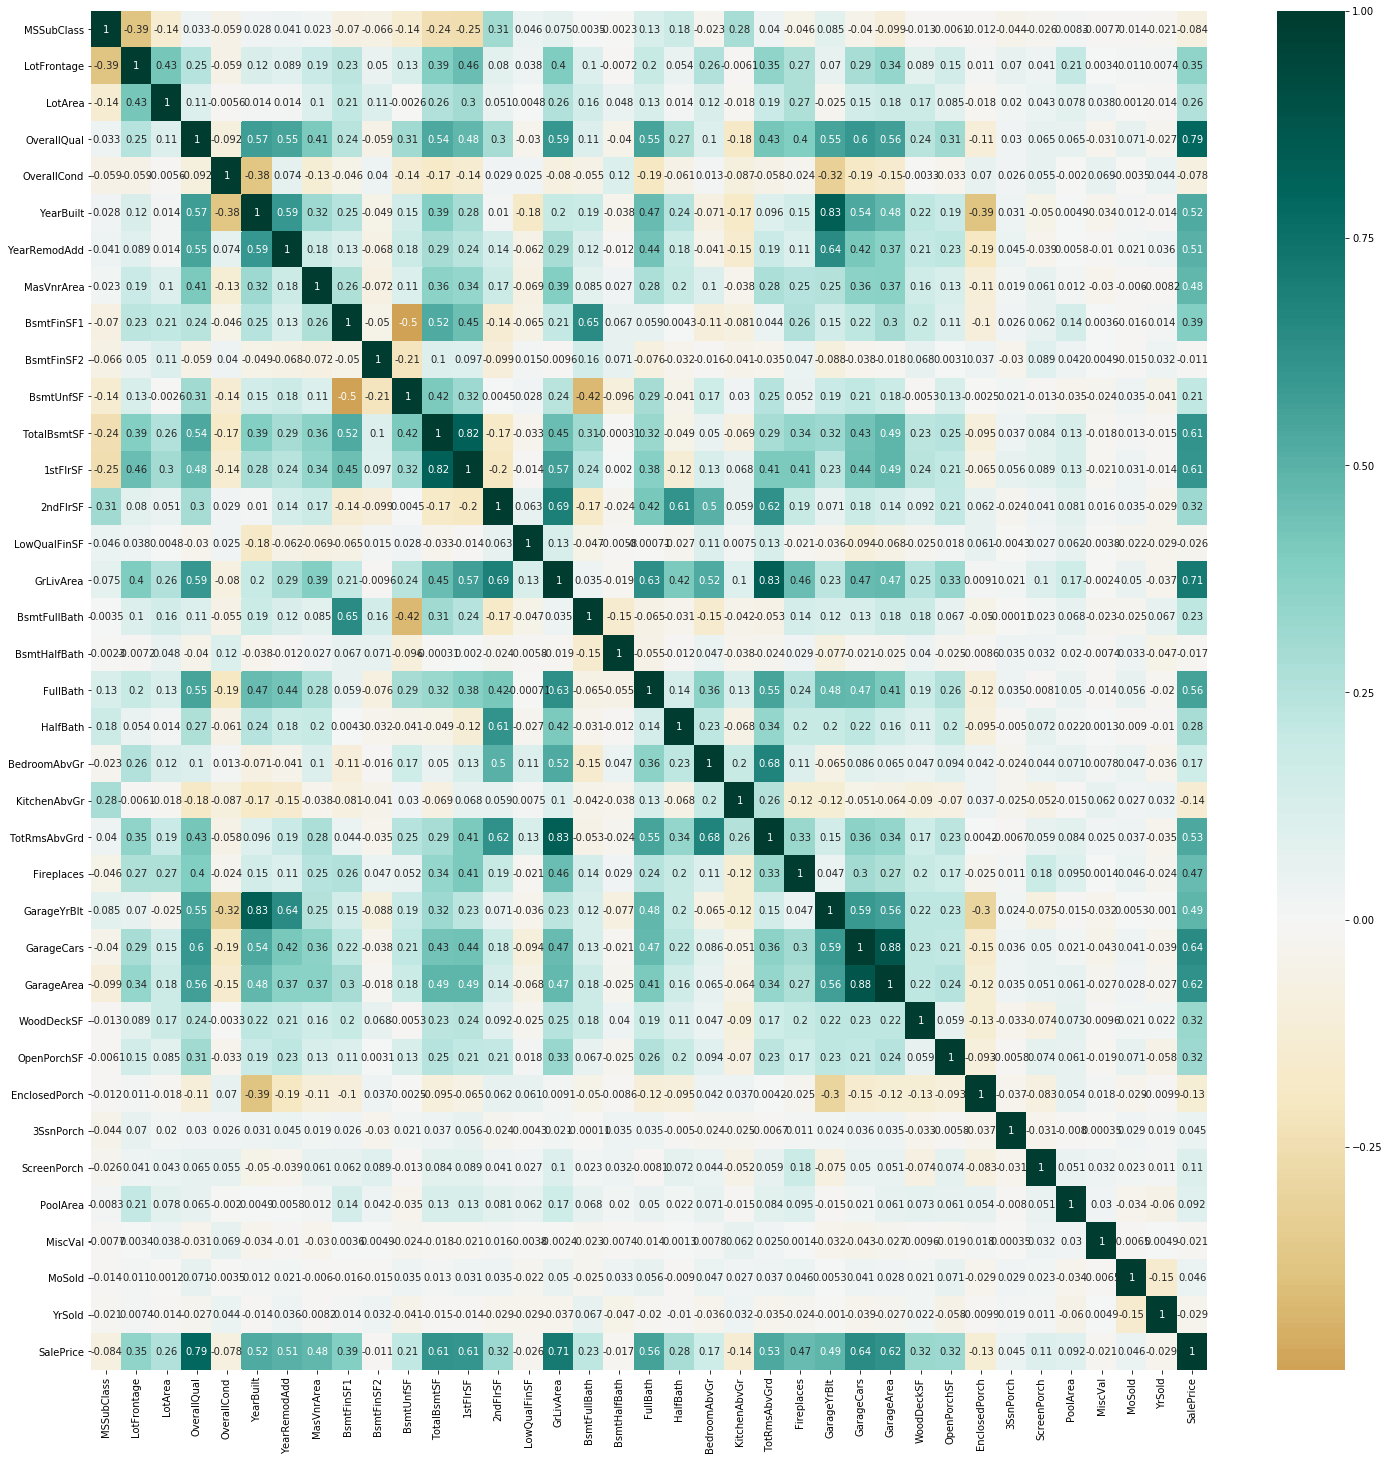

In [17]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train_numerical.corr(), center=0, cmap="BrBG", annot=True)

In [19]:
df_train_numerical.drop(["MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","KitchenAbvGr","EnclosedPorch","3SsnPorch","MiscVal","MoSold","YrSold"],axis = 1,inplace = True)
df_test_numerical.drop(["MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","KitchenAbvGr","EnclosedPorch","3SsnPorch","MiscVal","MoSold","YrSold"],axis = 1,inplace = True)

In [31]:
df_train_numerical["LotFrontage"].fillna(df_train_numerical["LotFrontage"].mean(),axis = 0,inplace = True)

In [34]:
df_train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
LotFrontage     1460 non-null float64
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
MasVnrArea      1452 non-null float64
BsmtFinSF1      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageYrBlt     1379 non-null float64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
WoodDeckSF      1460 non-null int64
OpenPorchSF     1460 non-null int64
ScreenPorch     1460 no

In [35]:
df_train_numerical["GarageYrBlt"].fillna(df_train_numerical["GarageYrBlt"].mean(),axis = 0,inplace = True)
df_test_numerical["GarageYrBlt"].fillna(df_test_numerical["GarageYrBlt"].mean(),axis = 0,inplace = True)

In [36]:
df_train_numerical["MasVnrArea"].fillna(df_train_numerical["MasVnrArea"].mean(),axis = 0,inplace = True)
df_test_numerical["MasVnrArea"].fillna(df_test_numerical["MasVnrArea"].mean(),axis = 0,inplace = True)

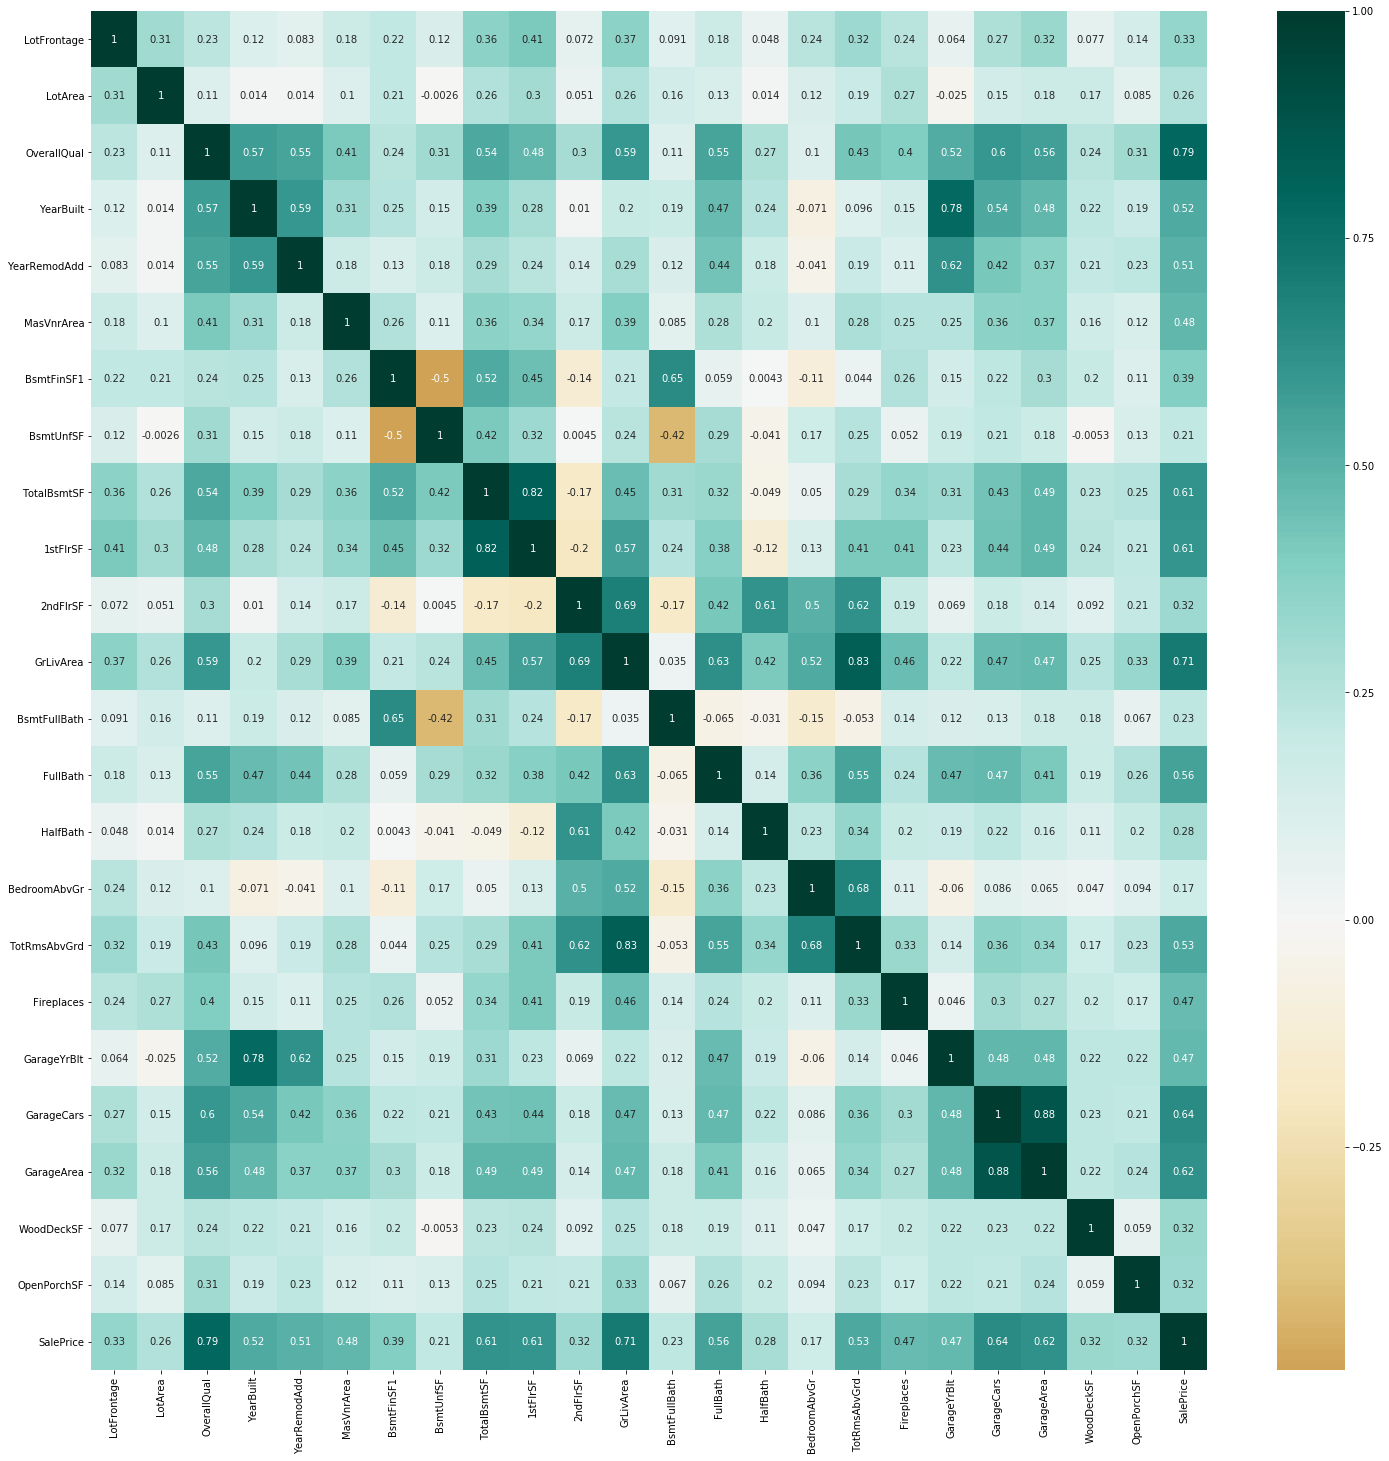

In [42]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_train_numerical.corr(), center=0, cmap="BrBG", annot=True)

In [41]:
df_train_numerical.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

Columns Having Lower Correlation With The Y label or in other words were contributing less.

In [40]:
df_train_numerical.drop(["BsmtHalfBath","ScreenPorch","PoolArea"],axis = 1, inplace = True)
df_test_numerical.drop(["BsmtHalfBath","ScreenPorch","PoolArea"],axis = 1, inplace = True)

In [46]:
df_train_categorical = df_train.copy().select_dtypes(exclude = ["int64","float64"])
df_test_categorical = df_test.copy().select_dtypes(exclude = ["int64","float64"])

In [48]:
df_train_categorical.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis = 1,inplace = True)
df_test_categorical.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis = 1,inplace = True)

In [75]:
df_train_categorical["Electrical"].fillna("other",axis = 0, inplace = True)

One Hot Encoding On the Categorical Data using get dummies

In [77]:
df_test_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 38 columns):
MSZoning         1459 non-null object
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     14

In [86]:
df_test_categorical['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
other         4
Name: MSZoning, dtype: int64

In [131]:
for col in df_train_categorical.columns:
    print(df_train_categorical[col].value_counts())

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64
VinylSd  

0.8211103495544894

In [147]:
df_train_categorical['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [148]:
df_train_categorical.drop("SaleCondition",axis = 1, inplace = True)
df_test_categorical.drop("SaleCondition",axis = 1, inplace = True)

In [149]:
df_train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
LotShape        1460 non-null object
LotConfig       1460 non-null object
Neighborhood    1460 non-null object
HouseStyle      1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType      1460 non-null object
ExterQual       1460 non-null object
Foundation      1460 non-null object
BsmtQual        1460 non-null object
BsmtExposure    1460 non-null object
BsmtFinType1    1460 non-null object
HeatingQC       1460 non-null object
KitchenQual     1460 non-null object
Functional      1460 non-null object
GarageType      1460 non-null object
GarageFinish    1460 non-null object
dtypes: object(17)
memory usage: 194.0+ KB


In [150]:
df_train_numerical_copy = df_train_numerical.copy()

In [151]:
df_train_categorical_copy = df_train_categorical.copy()

In [152]:
df_test_numerical_copy = df_test_numerical.copy()

In [153]:
df_test_categorical_copy = df_test_categorical.copy()

In [154]:
df_result = pd.concat([df_train_numerical,df_train_categorical],axis = 1, sort = False)

In [173]:
df_result_test = pd.concat([df_test_numerical,df_test_categorical],axis = 1, sort = False)

In [175]:
df_result_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [212]:
df_result.shape

(1460, 40)

In [215]:
df_result_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [214]:
df_result.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [157]:
a = df_result.SalePrice

In [159]:
df_result.drop("SalePrice",axis = 1, inplace = True )

In [205]:
df_result_test["GarageArea"].fillna(df_result_test["GarageArea"].mean(),axis = 0,inplace=True)

In [206]:
df_result_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 40 columns):
LotFrontage     1459 non-null float64
LotArea         1459 non-null int64
OverallQual     1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
MasVnrArea      1459 non-null float64
BsmtFinSF1      1459 non-null float64
BsmtUnfSF       1459 non-null float64
TotalBsmtSF     1459 non-null float64
1stFlrSF        1459 non-null int64
2ndFlrSF        1459 non-null int64
GrLivArea       1459 non-null int64
BsmtFullBath    1459 non-null float64
FullBath        1459 non-null int64
HalfBath        1459 non-null int64
BedroomAbvGr    1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
Fireplaces      1459 non-null int64
GarageYrBlt     1459 non-null float64
GarageCars      1459 non-null float64
GarageArea      1459 non-null float64
WoodDeckSF      1459 non-null int64
OpenPorchSF     1459 non-null int64
LotShape        1459 non-null int32
LotConfig  

In [161]:
X = df_result

In [163]:
y = a

In [168]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in X.columns:
    if(X[col].dtype == "object"):
        X[col] = lb.fit_transform(X[col])

In [207]:
lb1 = LabelEncoder()
for cols in df_result_test.columns:
    if(df_result_test[cols].dtype == "object"):
        df_result_test[cols] = lb1.fit_transform(df_result_test[cols])

In [256]:
df_result_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 40 columns):
LotFrontage     1459 non-null float64
LotArea         1459 non-null int64
OverallQual     1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
MasVnrArea      1459 non-null float64
BsmtFinSF1      1459 non-null float64
BsmtUnfSF       1459 non-null float64
TotalBsmtSF     1459 non-null float64
1stFlrSF        1459 non-null int64
2ndFlrSF        1459 non-null int64
GrLivArea       1459 non-null int64
BsmtFullBath    1459 non-null float64
FullBath        1459 non-null int64
HalfBath        1459 non-null int64
BedroomAbvGr    1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
Fireplaces      1459 non-null int64
GarageYrBlt     1459 non-null float64
GarageCars      1459 non-null float64
GarageArea      1459 non-null float64
WoodDeckSF      1459 non-null int64
OpenPorchSF     1459 non-null int64
LotShape        1459 non-null int32
LotConfig  

In [228]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [246]:
from sklearn.ensemble import RandomForestRegressor
lr = RandomForestRegressor(n_estimators = 100)
lr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [247]:
pred = lr.predict(df_result_test)

In [248]:
pred

array([125651.83, 153893.  , 182822.05, ..., 151208.3 , 115638.5 ,
       227877.2 ])

In [255]:
print(lr.feature_importances_)

[0.00746353 0.01320717 0.5904121  0.00878442 0.00800166 0.00618839
 0.02902487 0.00664215 0.0385388  0.02576808 0.03780947 0.11364312
 0.00126547 0.00527059 0.0008414  0.00227428 0.00595736 0.002801
 0.00504235 0.01583754 0.01617793 0.0056804  0.00639386 0.0016689
 0.0010526  0.00904011 0.00097963 0.00188149 0.00208975 0.00128393
 0.00308039 0.0006173  0.00470392 0.00227897 0.00173389 0.00100068
 0.00341769 0.00086727 0.00539879 0.00587872]


In [287]:
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [249]:
from sklearn.metrics import r2_score
r2_score(sample_submission["SalePrice"],pred)

-17.43935703882662

In [216]:
sample_submission = pd.read_csv("Desktop/sample_submission.csv")

In [218]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [275]:
X_try1 = X
y_try1 = y

In [289]:
X_try1.drop(["LotFrontage","YearRemodAdd","MasVnrArea","BsmtUnfSF","1stFlrSF","2ndFlrSF","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd", "Fireplaces", "GarageYrBlt","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "LotShape","LotConfig", "Neighborhood", "HouseStyle", "Exterior1st", "Exterior2nd","MasVnrType", "ExterQual", "Foundation", "BsmtQual", "BsmtExposure","BsmtFinType1", "HeatingQC", "KitchenQual", "Functional", "GarageType"],axis = 1,inplace=True)

In [291]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_try1,y_try1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [292]:
pred_new = rf.predict(X_try1)

In [293]:
pred_new

array([205920.  , 176350.9 , 219857.25, ..., 265492.  , 135331.5 ,
       150347.  ])

In [296]:
df_result_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish'],
      dtype='object')

In [322]:
test_try1 = df_result_test

In [323]:
test_try1.drop(["LotFrontage","YearRemodAdd","MasVnrArea","BsmtUnfSF","1stFlrSF","2ndFlrSF","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd", "Fireplaces","GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "LotShape","LotConfig", "Neighborhood", "HouseStyle", "Exterior1st", "Exterior2nd","MasVnrType", "ExterQual", "Foundation", "BsmtQual", "BsmtExposure","BsmtFinType1", "HeatingQC", "KitchenQual", "Functional", "GarageType"],axis = 1,inplace=True)

KeyError: "['LotFrontage' 'YearRemodAdd' 'MasVnrArea' 'BsmtUnfSF' '1stFlrSF'\n '2ndFlrSF' 'BsmtFullBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'\n 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'GarageArea' 'WoodDeckSF'\n 'OpenPorchSF' 'LotShape' 'LotConfig' 'Neighborhood' 'HouseStyle'\n 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'ExterQual' 'Foundation'\n 'BsmtQual' 'BsmtExposure' 'BsmtFinType1' 'HeatingQC' 'KitchenQual'\n 'Functional' 'GarageType'] not found in axis"

In [301]:
r2_score(y_try1,pred_new)

0.9785810231360966

In [313]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)
rf.fit(X_try1,y_try1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [320]:
test_try1.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'GarageFinish'],
      dtype='object')

In [314]:
pred_new = rf.predict(test_try1)

In [315]:
pred_new

array([129300. , 149400. , 185040. , ..., 152510.9, 127350. , 231400. ])

In [316]:
r2_score(sample_submission["SalePrice"],pred_new)

-17.711545717085674

In [311]:
sample_submission["SalePrice"].shape

(1459,)

In [312]:
from sklearn.metrics import mean_absolute_error

In [324]:
b = mean_absolute_error(pred_new)

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1459]

54072.53117695186